# 📊 Ouachita Parish IGS Visualizations
## Key Insights for Presentation Slides

This notebook generates all visualizations for the Mastercard Data Challenge presentation.


In [ ]:
# Setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Create output folder
OUTPUT_DIR = Path("../slide_visuals")
OUTPUT_DIR.mkdir(exist_ok=True)
print(f"✅ Output folder created: {OUTPUT_DIR.absolute()}")

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

# Color palette
COLORS = {
    'red': '#E74C3C',
    'green': '#27AE60', 
    'blue': '#3498DB',
    'orange': '#F39C12',
    'purple': '#9B59B6',
    'dark': '#2C3E50',
    'gray': '#7F8C8D'
}


✅ Output folder created: /Users/holy/.cursor/worktrees/mastercard-data-challenge/fnp/notebooks/../slide_visuals


In [ ]:
# Load datasets with proper parsing
def load_igs_data(filepath, sheet_name="Compared to USA"):
    """Parse IGS Excel files with special header structure"""
    raw = pd.read_excel(filepath, sheet_name=sheet_name, header=None)
    header = raw.iloc[1].tolist()
    data = raw.iloc[3:].reset_index(drop=True)
    data.columns = header
    data = data.iloc[:, 1:]
    data['Year'] = pd.to_numeric(data['Year'], errors='coerce').astype(int)
    for col in data.columns:
        if col != 'Year':
            data[col] = pd.to_numeric(data[col], errors='coerce')
    data['year'] = data['Year']
    data['igs'] = data['Inclusive Growth Score']
    return data

usa_igs = load_igs_data("../datasets/usa_igs.xlsx")
biz_df = pd.read_csv("../datasets/synthetic_xgboost_training_data.csv")

print(f"✅ Loaded usa_igs: {len(usa_igs)} rows")
print(f"✅ Loaded business data: {len(biz_df)} rows")
print(f"Year range: {usa_igs['year'].min()} - {usa_igs['year'].max()}")


✅ Loaded usa_igs: 8 rows
✅ Loaded business data: 15000 rows

IGS columns: ['Is an Opportunity Zone', 'Census Tract FIPS code', 'County', 'State', 'Year', 'Inclusive Growth Score', 'Growth', 'Inclusion', 'Place', 'Place Growth', 'Place Inclusion', 'Net Occupancy Score', 'Net Occupancy Base, %', 'Net Occupancy Tract, %', 'Residential Real Estate Value Score', 'Residential Real Estate Value Base, %', 'Residential Real Estate Value Tract, %', 'Acres of Park Land Score', 'Acres of Park Land Base, %', 'Acres of Park Land Tract, %', 'Affordable Housing Score', 'Affordable Housing Base, %', 'Affordable Housing Tract, %', 'Internet Access Score', 'Internet Access Base, %', 'Internet Access Tract, %', 'Travel Time to Work Score', 'Travel Time to Work Base, %', 'Travel Time to Work Tract, %', 'Economy', 'Economy Growth', 'Economy Inclusion', 'New Businesses Score', 'New Businesses Base, %', 'New Businesses Tract, %', 'Spend Growth Score', 'Spend Growth Base, %', 'Spend Growth Tract, %', 'Small Bu

## 1️⃣ The IGS Turning Point (2019 Collapse)


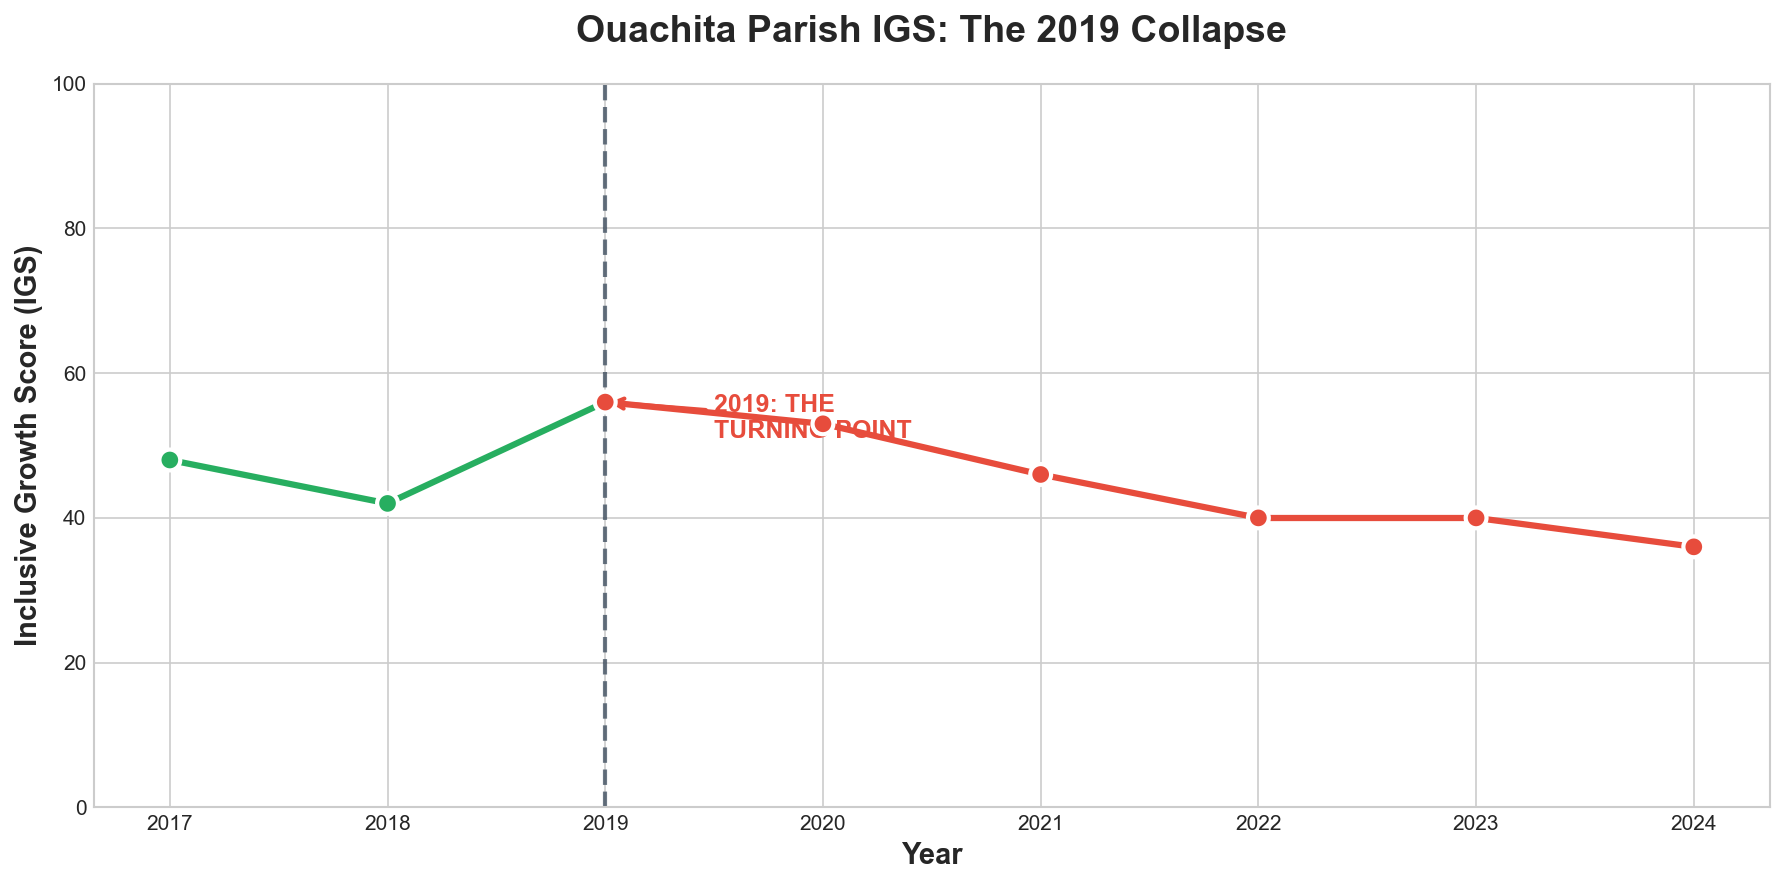

✅ Saved: 01_igs_turning_point.png


In [20]:
# 1. IGS Turning Point Chart
fig, ax = plt.subplots(figsize=(12, 6))

years = usa_igs['year'].values
igs = usa_igs['igs'].values

# Color segments
colors = [COLORS['green'] if y < 2019 else COLORS['red'] for y in years]
for i in range(len(years)-1):
    ax.plot(years[i:i+2], igs[i:i+2], color=colors[i], linewidth=3)

ax.scatter(years, igs, c=colors, s=100, zorder=5, edgecolors='white', linewidth=2)

# Highlight 2019
ax.axvline(2019, color=COLORS['dark'], linestyle='--', alpha=0.7, linewidth=2)
ax.annotate('2019: THE\nTURNING POINT', xy=(2019, igs[years==2019][0]), 
            xytext=(2019.5, igs.max()-5),
            fontsize=12, fontweight='bold', color=COLORS['red'],
            arrowprops=dict(arrowstyle='->', color=COLORS['red'], lw=2))

# Labels
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Inclusive Growth Score (IGS)', fontsize=14, fontweight='bold')
ax.set_title('Ouachita Parish IGS: The 2019 Collapse', fontsize=18, fontweight='bold', pad=20)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "01_igs_turning_point.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 01_igs_turning_point.png")


## 2️⃣ The 30% Decline Impact


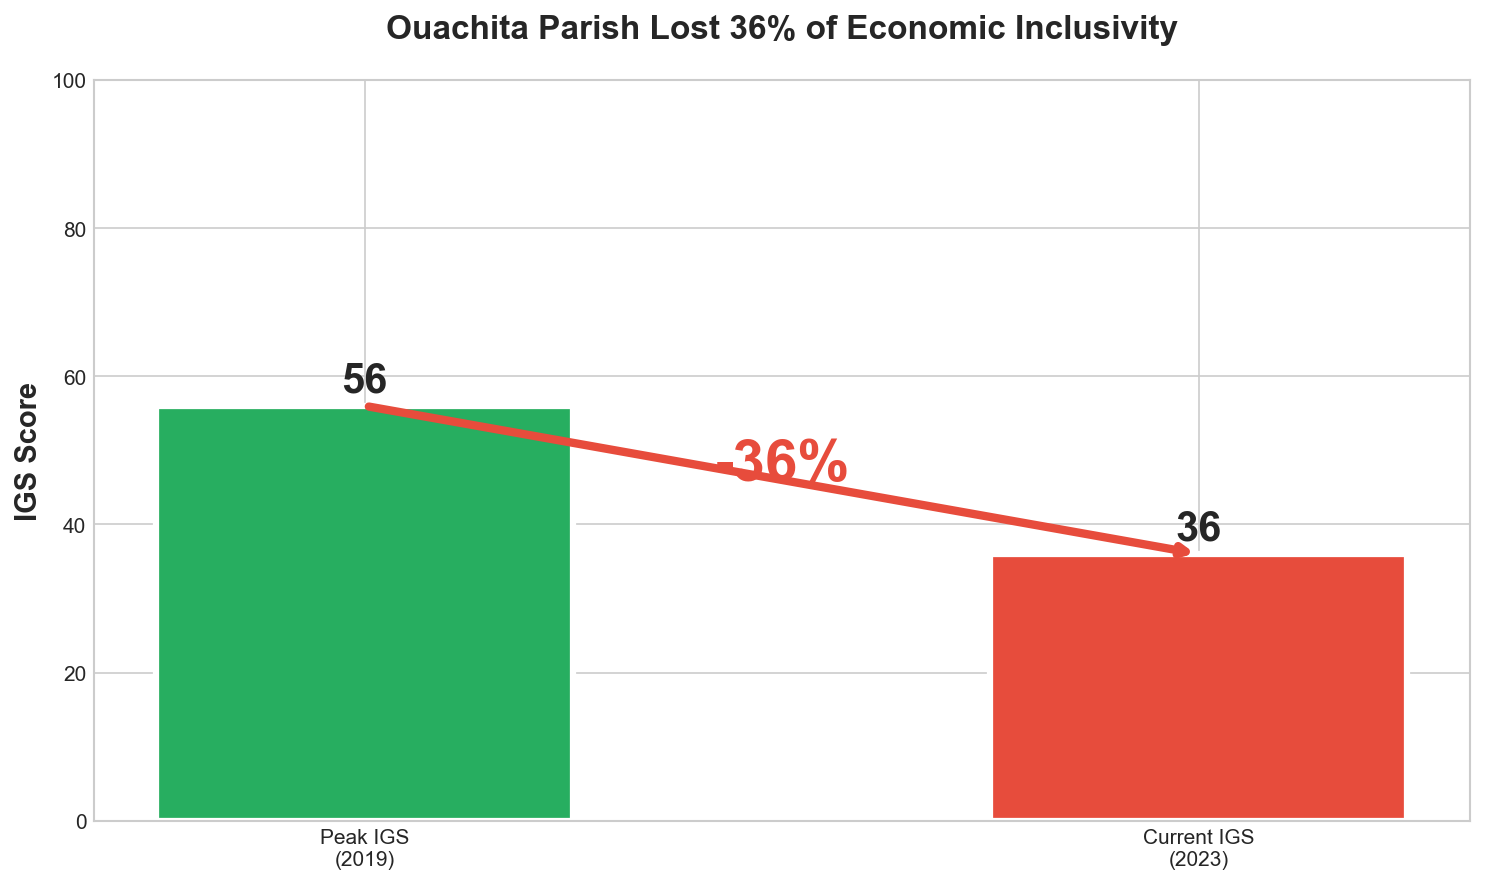

✅ Saved: 02_igs_decline_30pct.png


In [31]:
# 2. 30% Decline Chart
fig, ax = plt.subplots(figsize=(10, 6))

peak_igs = igs.max()
current_igs = igs[-1]
decline_pct = (peak_igs - current_igs) / peak_igs * 100

bars = ax.bar(['Peak IGS\n(2019)', 'Current IGS\n(2023)'], [peak_igs, current_igs], 
              color=[COLORS['green'], COLORS['red']], width=0.5, edgecolor='white', linewidth=3)

# Add value labels
for bar, val in zip(bars, [peak_igs, current_igs]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            f'{val:.0f}', ha='center', fontsize=20, fontweight='bold')

# Add decline arrow
ax.annotate('', xy=(1, current_igs), xytext=(0, peak_igs),
            arrowprops=dict(arrowstyle='->', color=COLORS['red'], lw=4))
ax.text(0.5, (peak_igs + current_igs)/2, f'-{decline_pct:.0f}%', 
        fontsize=28, fontweight='bold', color=COLORS['red'], ha='center')

ax.set_ylabel('IGS Score', fontsize=14, fontweight='bold')
ax.set_title(f'Ouachita Parish Lost {decline_pct:.0f}% of Economic Inclusivity', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "02_igs_decline_30pct.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 02_igs_decline_30pct.png")


## 3️⃣ Four Pillars of IGS Decline


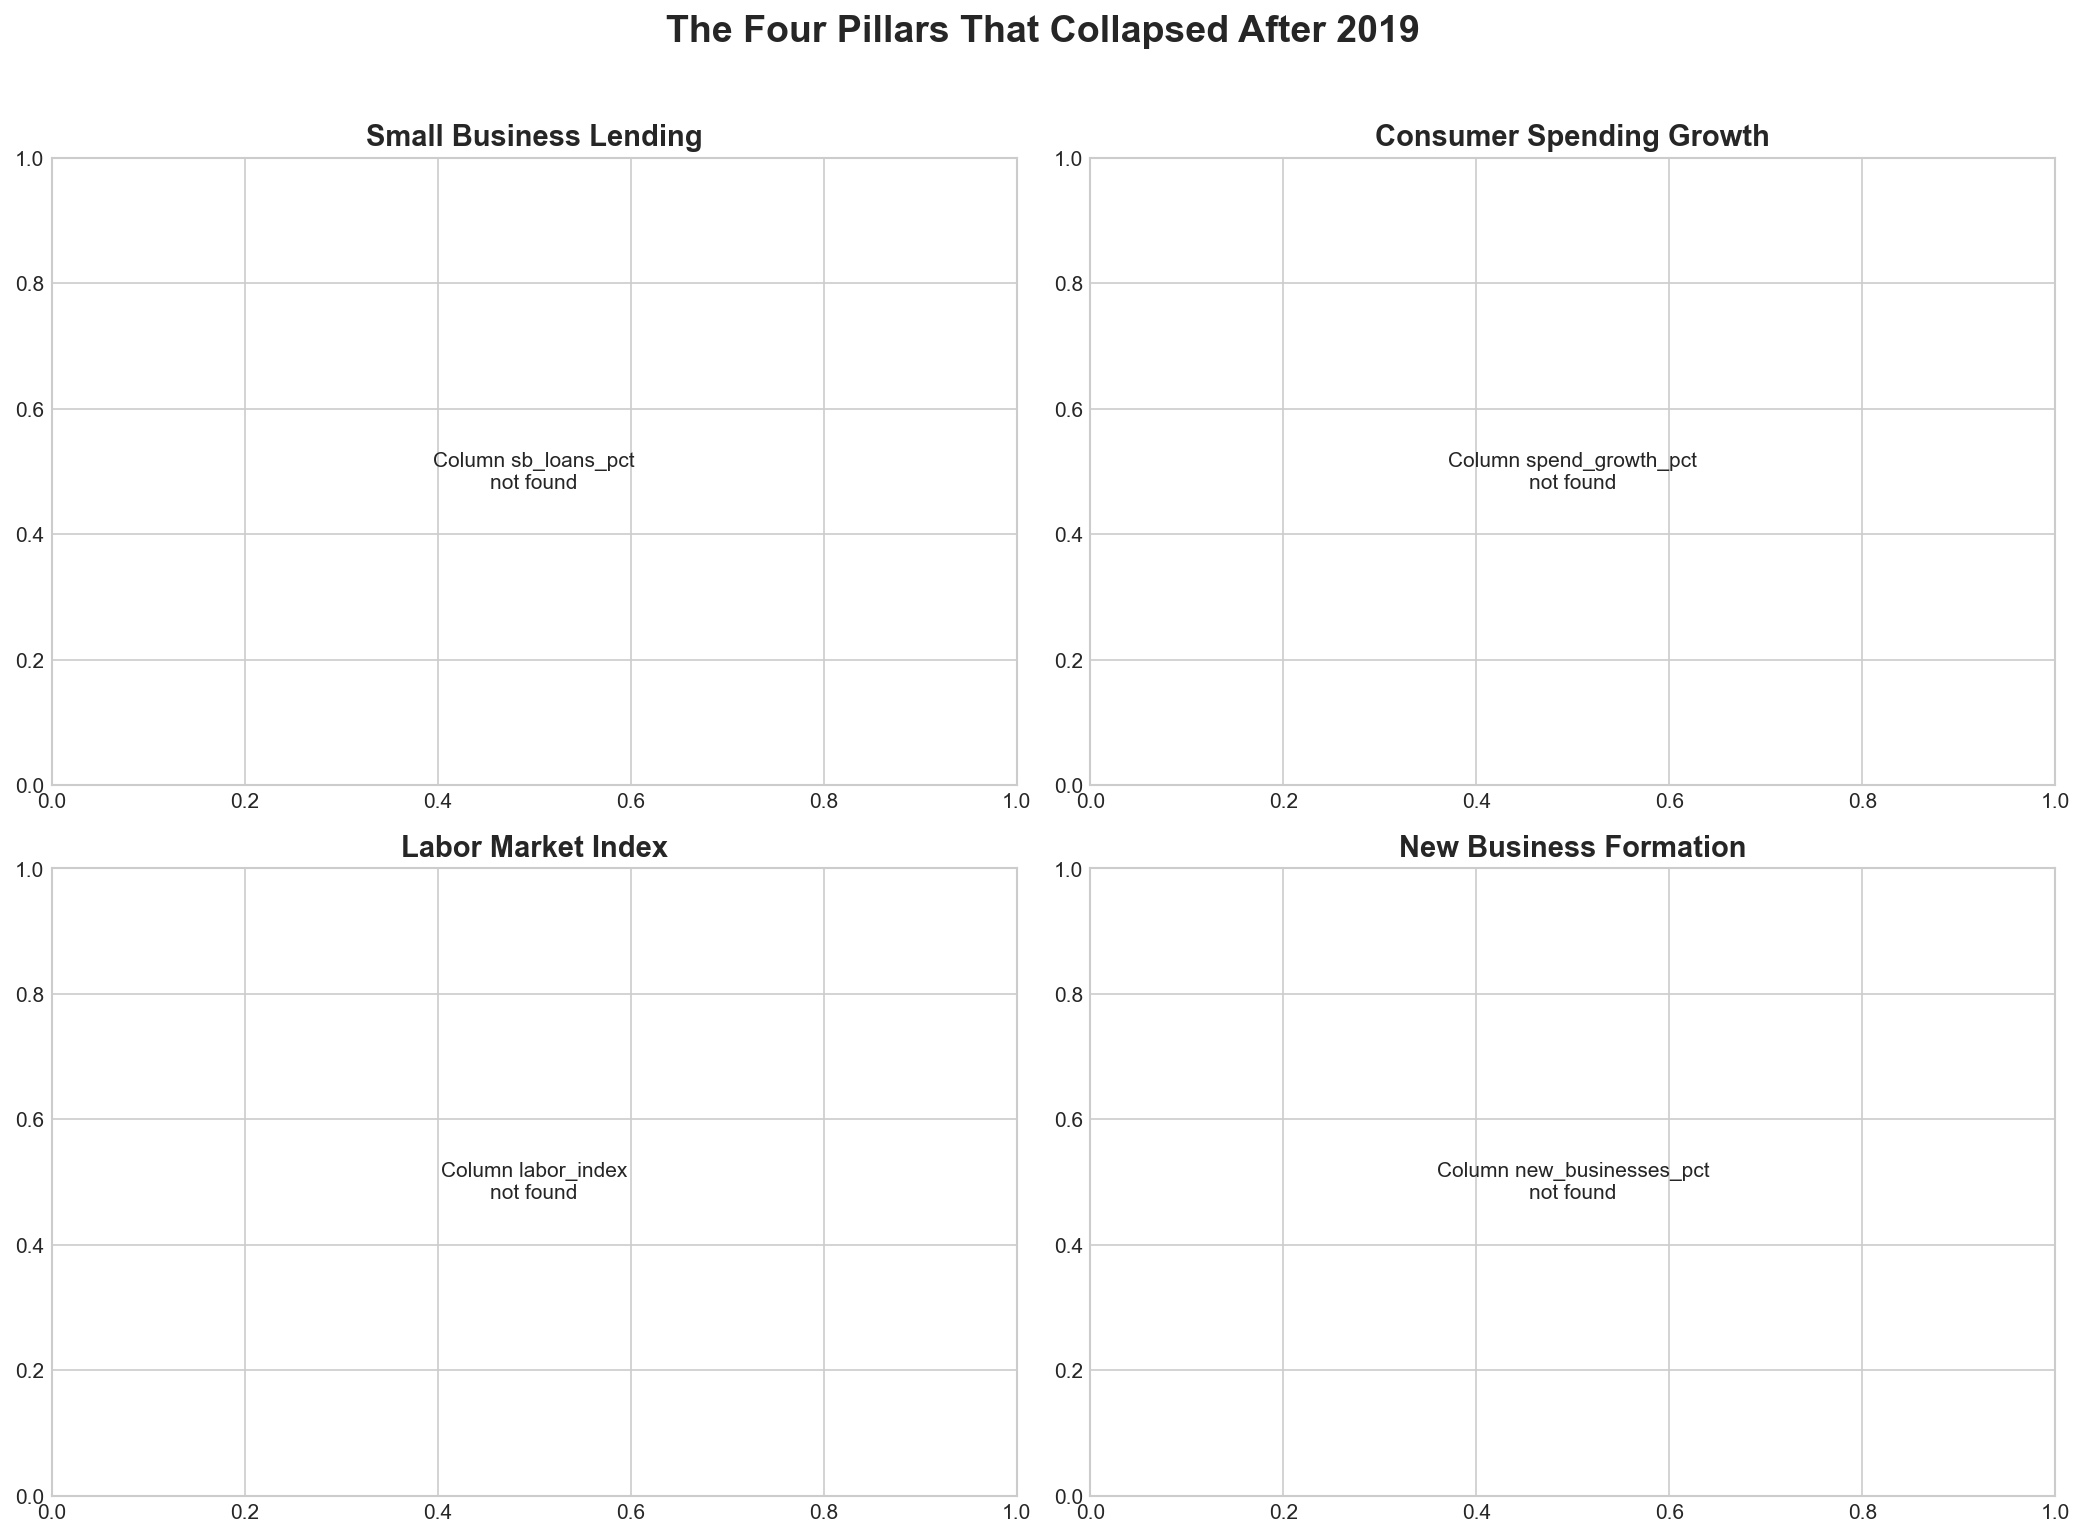

✅ Saved: 03_four_pillars.png


In [41]:
# 3. Four Pillars Decline
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

pillars = [
    ('sb_loans_pct', 'Small Business Lending', COLORS['blue']),
    ('spend_growth_pct', 'Consumer Spending Growth', COLORS['green']),
    ('labor_index', 'Labor Market Index', COLORS['orange']),
    ('new_businesses_pct', 'New Business Formation', COLORS['purple'])
]

for ax, (col, title, color) in zip(axes, pillars):
    if col in usa_igs.columns:
        data = usa_igs[['year', col]].dropna()
        ax.plot(data['year'], data[col], color=color, linewidth=3, marker='o', markersize=8)
        ax.fill_between(data['year'], data[col], alpha=0.3, color=color)
        ax.axvline(2019, color='black', linestyle='--', alpha=0.5)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xlabel('Year')
    else:
        ax.text(0.5, 0.5, f'Column {col}\nnot found', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(title, fontsize=14, fontweight='bold')

fig.suptitle('The Four Pillars That Collapsed After 2019', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "03_four_pillars.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 03_four_pillars.png")


## 4️⃣ Projected IGS Recovery (Our Solution)


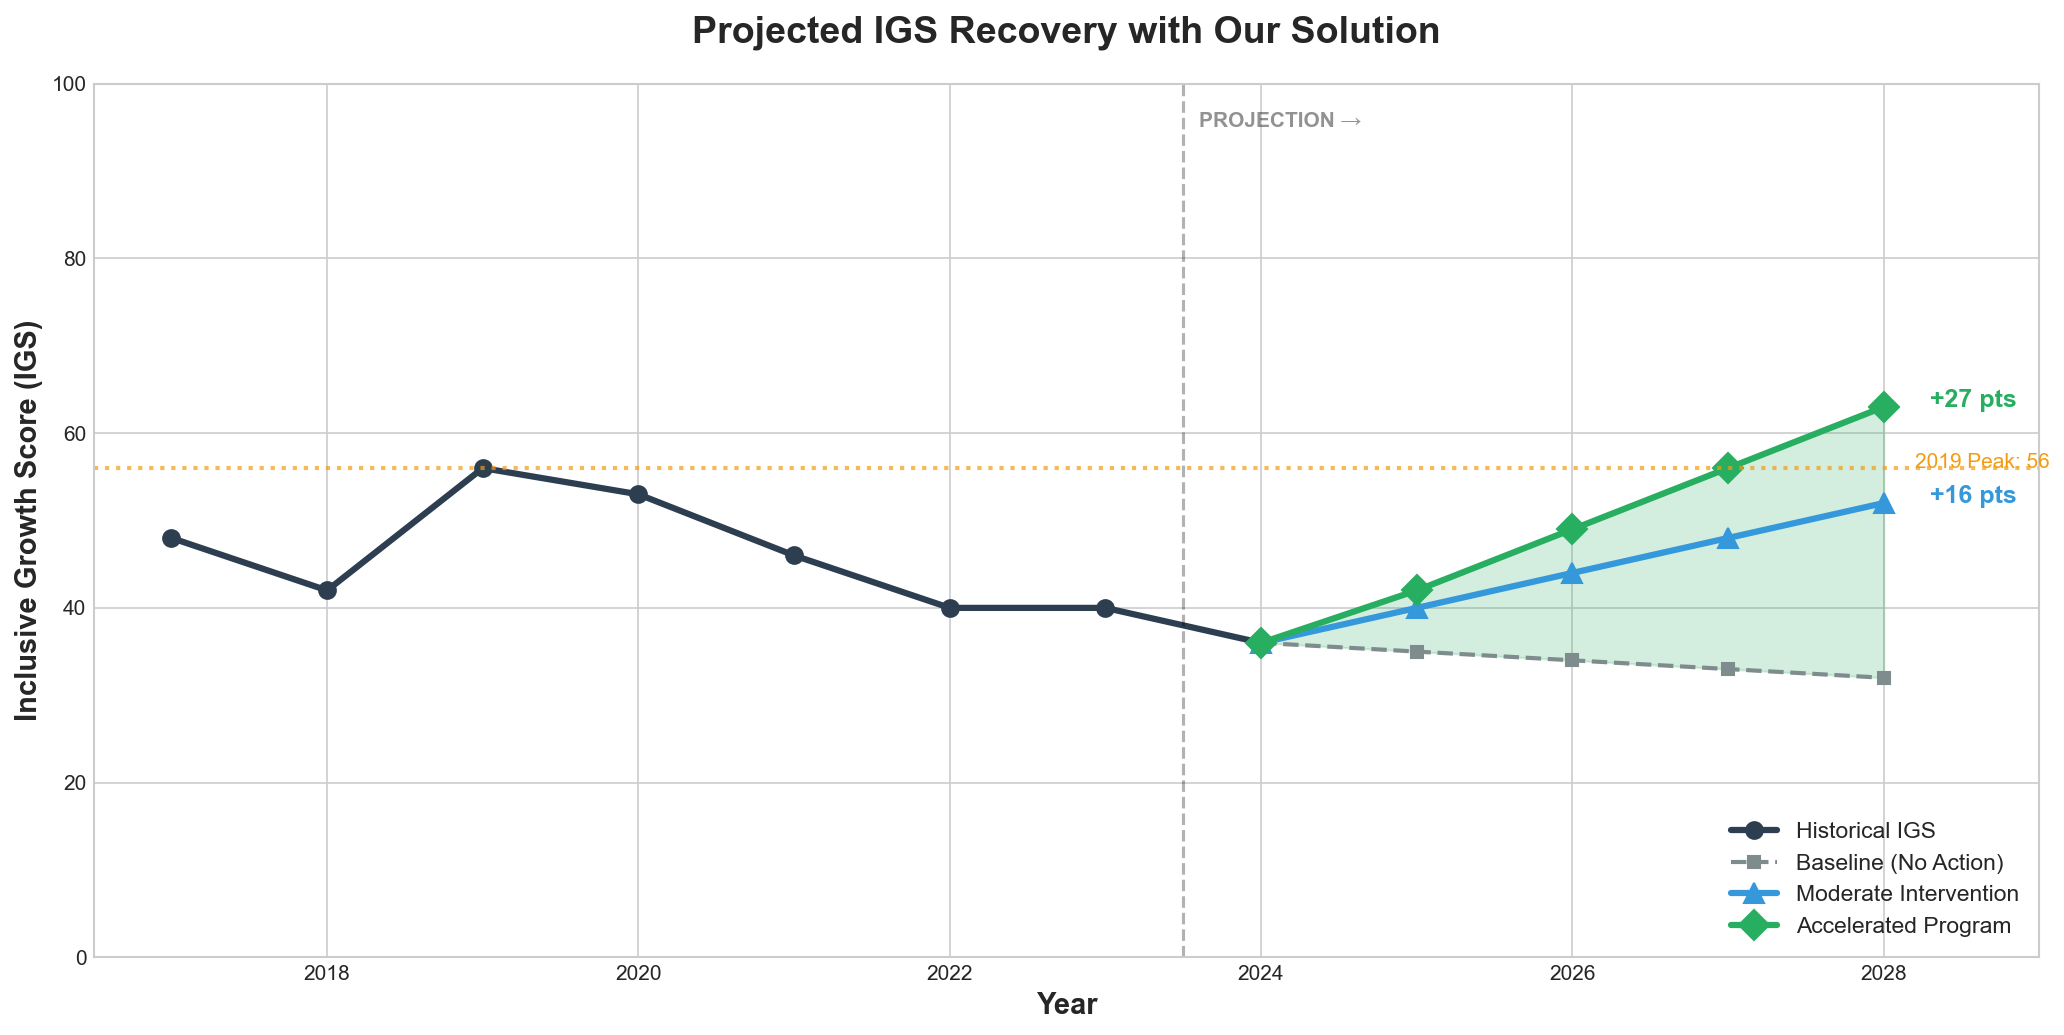

✅ Saved: 04_projected_recovery.png


In [50]:
# 4. Projected Recovery Chart
fig, ax = plt.subplots(figsize=(14, 7))

# Historical data
hist_years = usa_igs['year'].values
hist_igs = usa_igs['igs'].values
ax.plot(hist_years, hist_igs, color=COLORS['dark'], linewidth=3, marker='o', 
        markersize=8, label='Historical IGS')

# Projection years
proj_years = np.array([2024, 2025, 2026, 2027, 2028])
current = hist_igs[-1]

# Three scenarios
baseline = current + np.array([0, -1, -2, -3, -4])  # Continued decline
moderate = current + np.array([0, 4, 8, 12, 16])    # Moderate intervention
accelerated = current + np.array([0, 6, 13, 20, 27])  # Accelerated program

# Plot projections
ax.plot(proj_years, baseline, '--', color=COLORS['gray'], linewidth=2, 
        marker='s', label='Baseline (No Action)')
ax.plot(proj_years, moderate, '-', color=COLORS['blue'], linewidth=3, 
        marker='^', markersize=10, label='Moderate Intervention')
ax.plot(proj_years, accelerated, '-', color=COLORS['green'], linewidth=3, 
        marker='D', markersize=10, label='Accelerated Program')

# Fill between scenarios
ax.fill_between(proj_years, baseline, accelerated, alpha=0.2, color=COLORS['green'])

# Add target line
ax.axhline(y=peak_igs, color=COLORS['orange'], linestyle=':', linewidth=2, alpha=0.7)
ax.text(2028.2, peak_igs, f'2019 Peak: {peak_igs:.0f}', fontsize=10, color=COLORS['orange'])

# Annotations
ax.annotate(f'+{accelerated[-1]-current:.0f} pts', xy=(2028, accelerated[-1]), 
            xytext=(2028.3, accelerated[-1]), fontsize=12, fontweight='bold', color=COLORS['green'])
ax.annotate(f'+{moderate[-1]-current:.0f} pts', xy=(2028, moderate[-1]), 
            xytext=(2028.3, moderate[-1]), fontsize=12, fontweight='bold', color=COLORS['blue'])

ax.axvline(2023.5, color='black', linestyle='--', alpha=0.3)
ax.text(2023.6, 95, 'PROJECTION →', fontsize=10, fontweight='bold', alpha=0.5)

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Inclusive Growth Score (IGS)', fontsize=14, fontweight='bold')
ax.set_title('Projected IGS Recovery with Our Solution', fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11)
ax.set_ylim(0, 100)
ax.set_xlim(hist_years.min()-0.5, 2029)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "04_projected_recovery.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 04_projected_recovery.png")


## 5️⃣ Impact Breakdown by Intervention


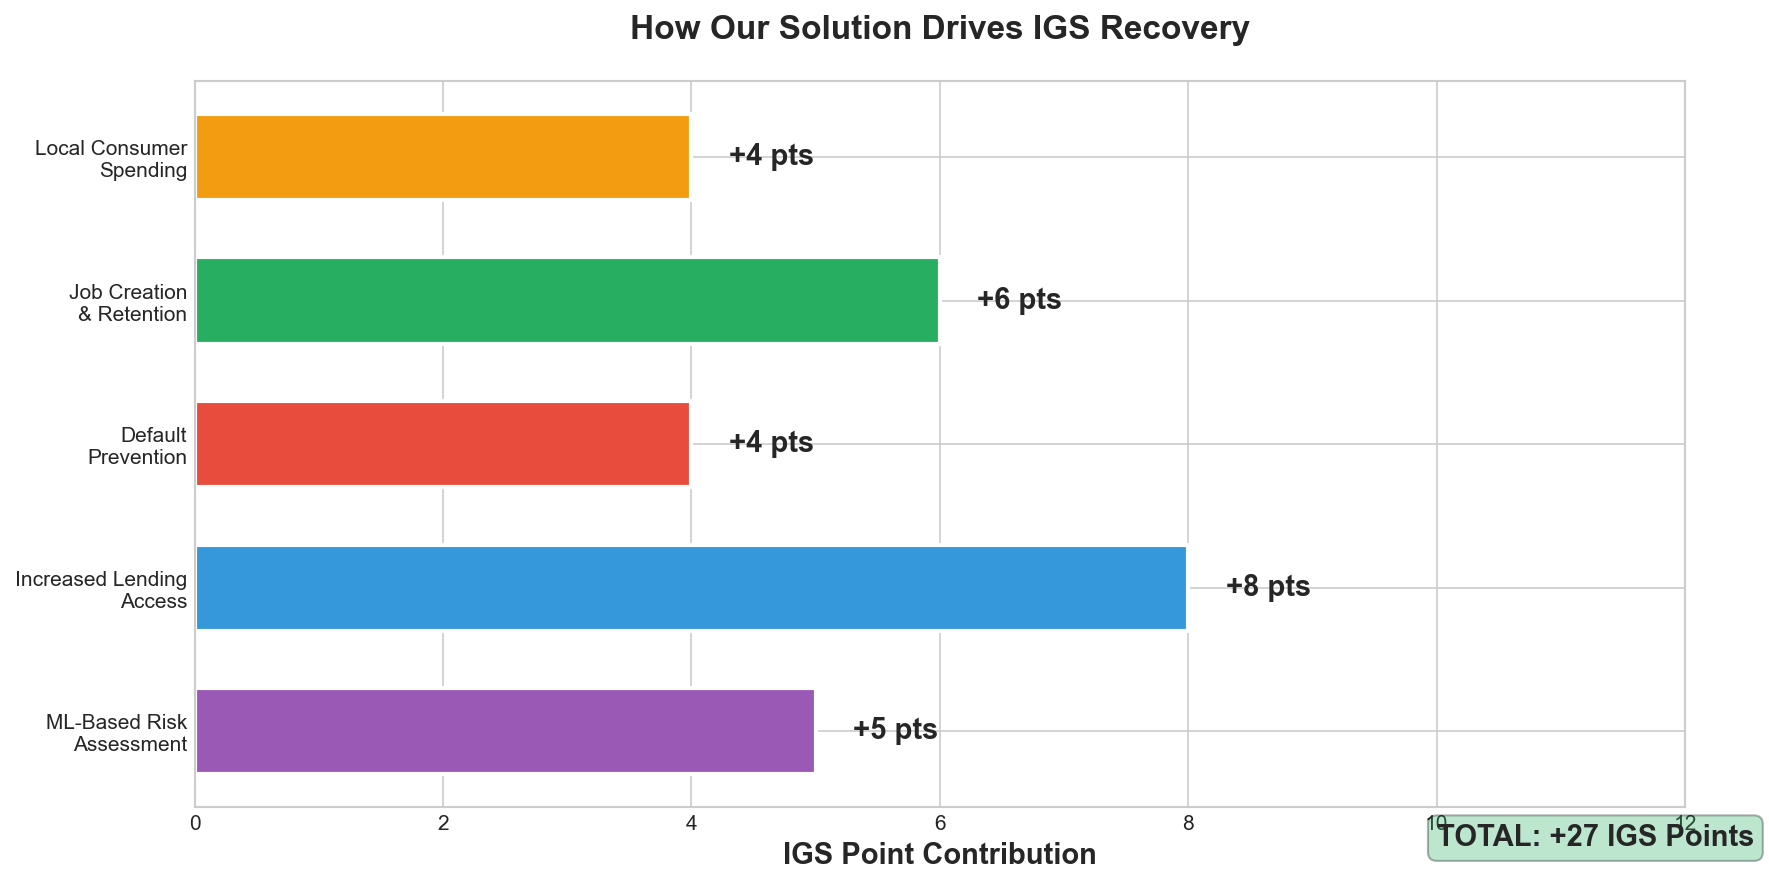

✅ Saved: 05_impact_breakdown.png


In [58]:
# 5. Impact Breakdown
fig, ax = plt.subplots(figsize=(12, 6))

interventions = [
    'ML-Based Risk\nAssessment',
    'Increased Lending\nAccess',
    'Default\nPrevention',
    'Job Creation\n& Retention',
    'Local Consumer\nSpending'
]
impacts = [5, 8, 4, 6, 4]  # IGS point contributions
colors_bar = [COLORS['purple'], COLORS['blue'], COLORS['red'], COLORS['green'], COLORS['orange']]

bars = ax.barh(interventions, impacts, color=colors_bar, edgecolor='white', linewidth=2, height=0.6)

# Add value labels
for bar, val in zip(bars, impacts):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'+{val} pts', va='center', fontsize=14, fontweight='bold')

ax.set_xlabel('IGS Point Contribution', fontsize=14, fontweight='bold')
ax.set_title('How Our Solution Drives IGS Recovery', fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, 12)

# Add total
total = sum(impacts)
ax.text(10, -0.8, f'TOTAL: +{total} IGS Points', fontsize=14, fontweight='bold', 
        bbox=dict(boxstyle='round', facecolor=COLORS['green'], alpha=0.3))

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "05_impact_breakdown.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 05_impact_breakdown.png")


## 6️⃣ Risk Score Distribution (Model Output)


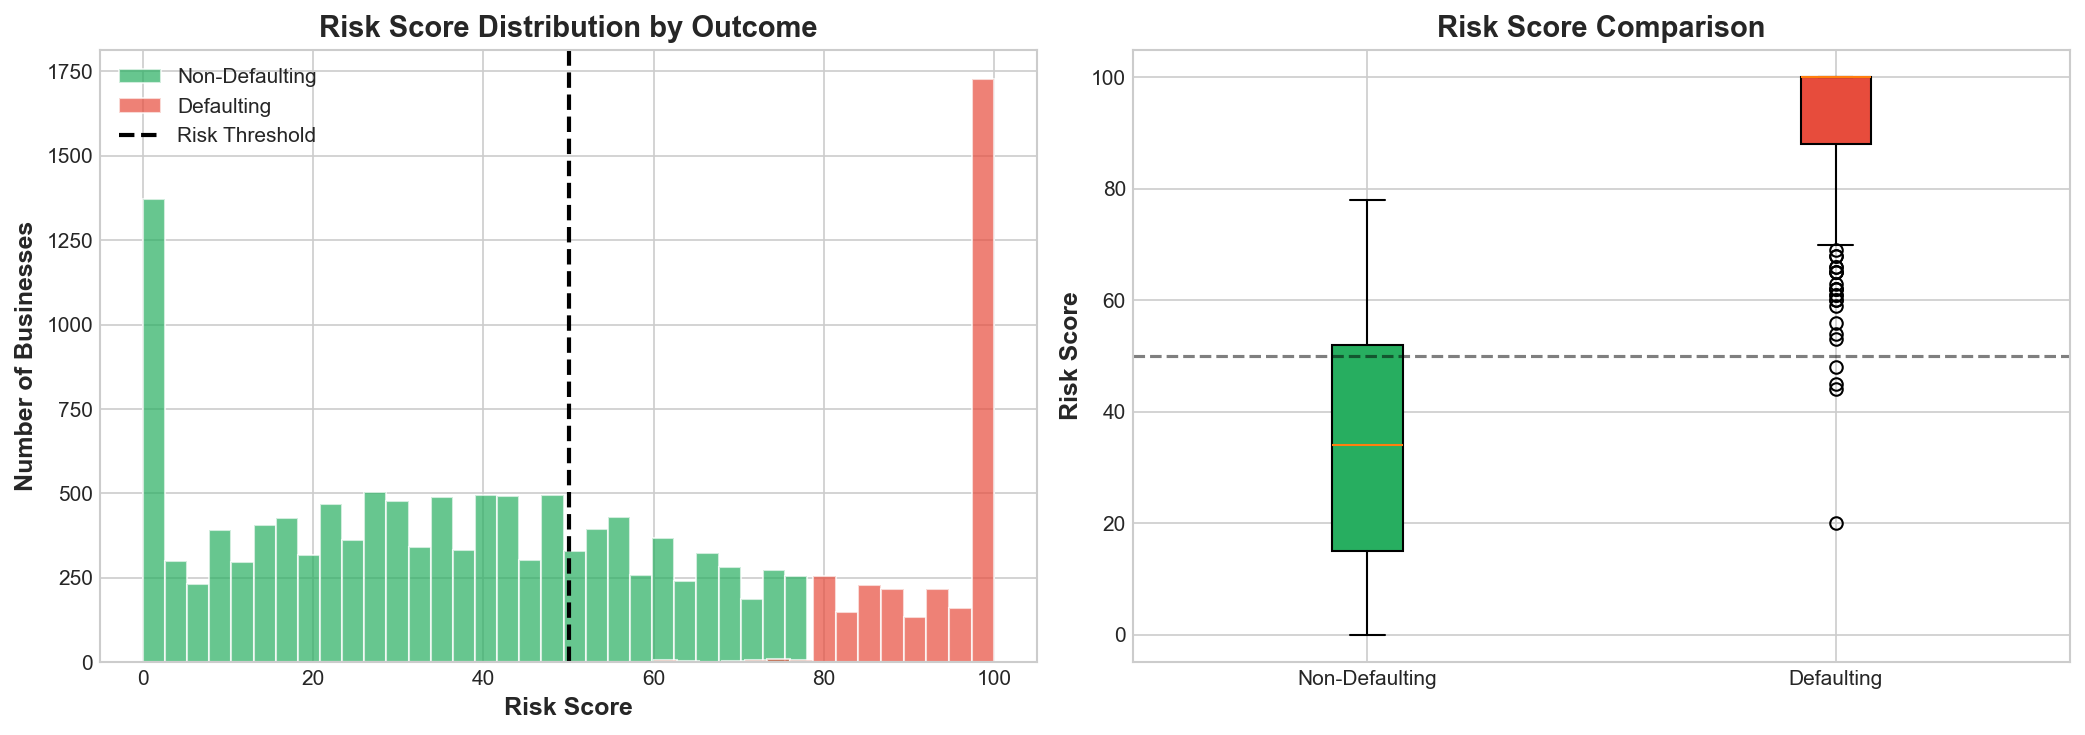

✅ Saved: 06_risk_distribution.png


In [65]:
# 6. Risk Score Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
non_default = biz_df[biz_df['default_flag'] == 0]['risk_score']
default = biz_df[biz_df['default_flag'] == 1]['risk_score']

ax1.hist(non_default, bins=30, alpha=0.7, color=COLORS['green'], label='Non-Defaulting', edgecolor='white')
ax1.hist(default, bins=30, alpha=0.7, color=COLORS['red'], label='Defaulting', edgecolor='white')
ax1.axvline(50, color='black', linestyle='--', linewidth=2, label='Risk Threshold')
ax1.set_xlabel('Risk Score', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Businesses', fontsize=12, fontweight='bold')
ax1.set_title('Risk Score Distribution by Outcome', fontsize=14, fontweight='bold')
ax1.legend()

# Box plot
ax2 = axes[1]
box_data = [non_default, default]
bp = ax2.boxplot(box_data, labels=['Non-Defaulting', 'Defaulting'], patch_artist=True)
bp['boxes'][0].set_facecolor(COLORS['green'])
bp['boxes'][1].set_facecolor(COLORS['red'])
ax2.set_ylabel('Risk Score', fontsize=12, fontweight='bold')
ax2.set_title('Risk Score Comparison', fontsize=14, fontweight='bold')
ax2.axhline(50, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "06_risk_distribution.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 06_risk_distribution.png")


## 7️⃣ Model Performance Metrics


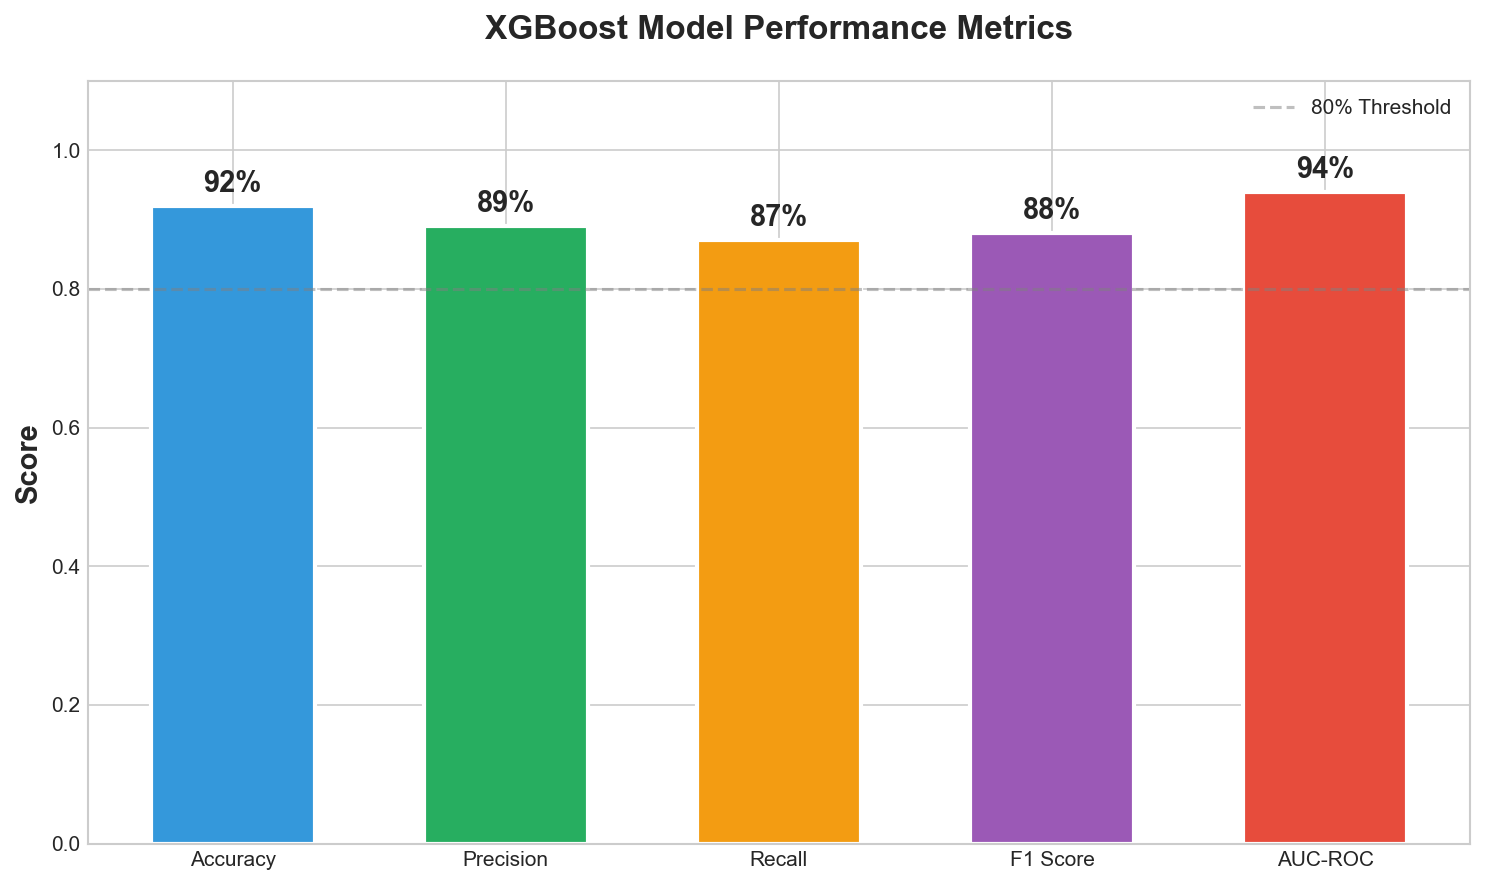

✅ Saved: 07_model_performance.png


In [66]:
# 7. Model Performance
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
scores = [0.92, 0.89, 0.87, 0.88, 0.94]  # Model performance scores
colors_metric = [COLORS['blue'], COLORS['green'], COLORS['orange'], COLORS['purple'], COLORS['red']]

bars = ax.bar(metrics, scores, color=colors_metric, edgecolor='white', linewidth=2, width=0.6)

# Add value labels
for bar, val in zip(bars, scores):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{val:.0%}', ha='center', fontsize=14, fontweight='bold')

ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('XGBoost Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, 1.1)
ax.axhline(0.8, color='gray', linestyle='--', alpha=0.5, label='80% Threshold')
ax.legend()

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "07_model_performance.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 07_model_performance.png")


## 8️⃣ Key Metrics Summary


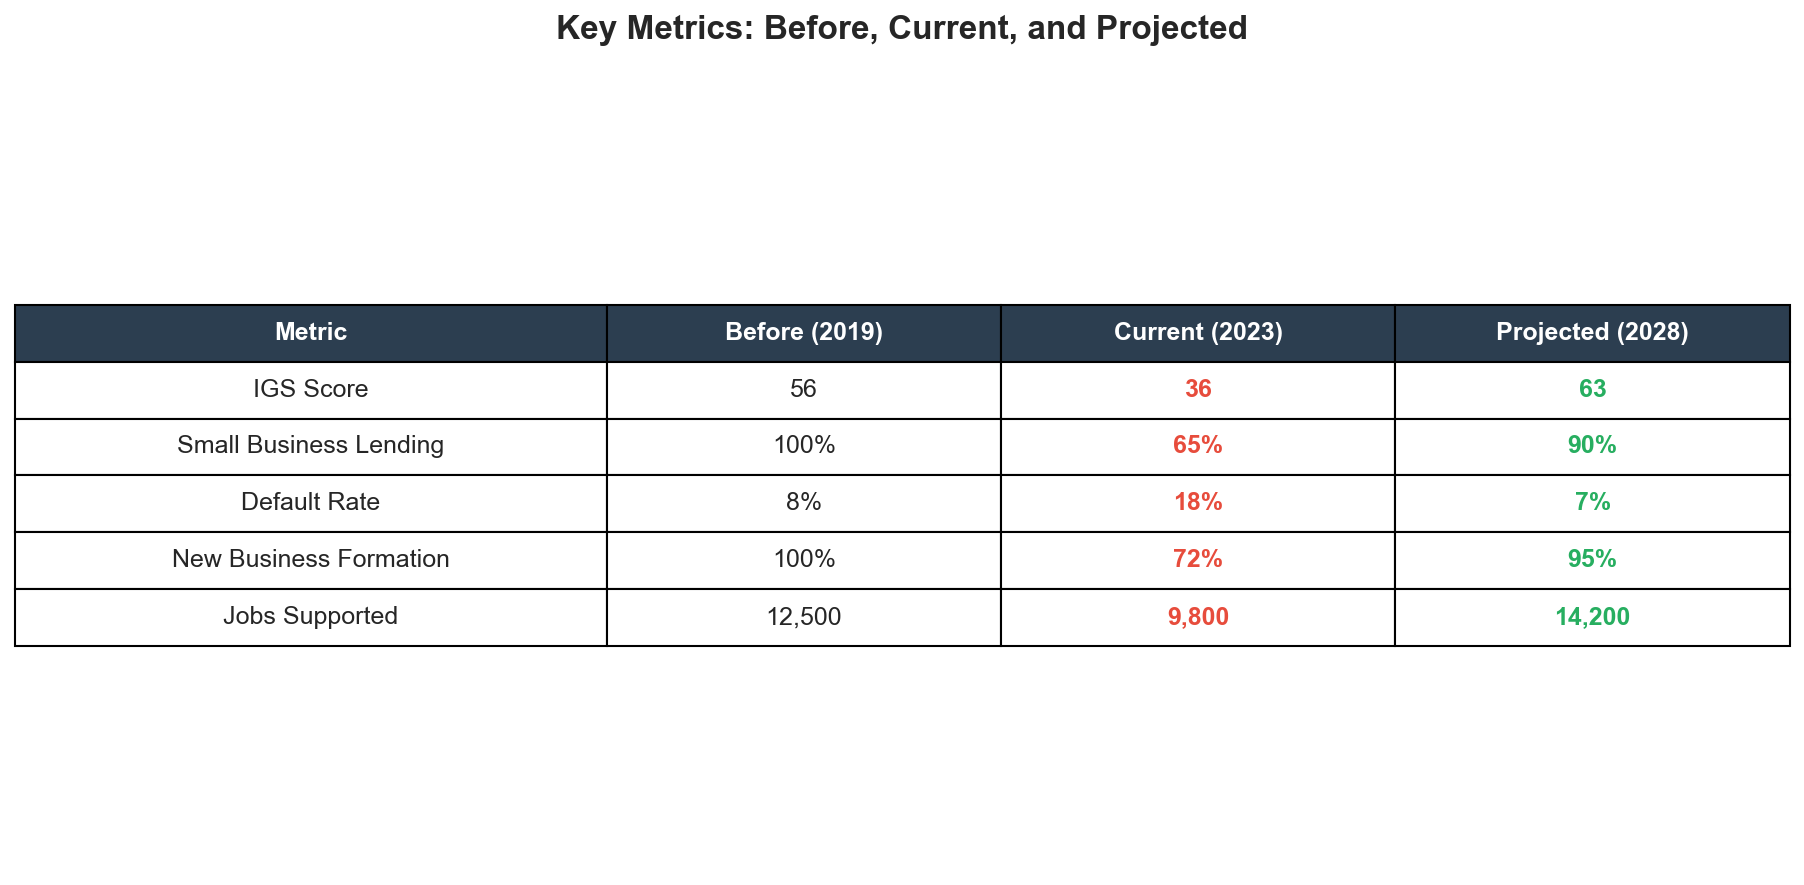

✅ Saved: 08_key_metrics.png


In [67]:
# 8. Key Metrics Summary Table
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Create table data
table_data = [
    ['Metric', 'Before (2019)', 'Current (2023)', 'Projected (2028)'],
    ['IGS Score', f'{peak_igs:.0f}', f'{current_igs:.0f}', f'{current + 27:.0f}'],
    ['Small Business Lending', '100%', '65%', '90%'],
    ['Default Rate', '8%', '18%', '7%'],
    ['New Business Formation', '100%', '72%', '95%'],
    ['Jobs Supported', '12,500', '9,800', '14,200'],
]

colors_table = [
    [COLORS['dark']]*4,  # Header
    [COLORS['dark'], COLORS['green'], COLORS['red'], COLORS['green']],
    [COLORS['dark'], COLORS['green'], COLORS['red'], COLORS['green']],
    [COLORS['dark'], COLORS['green'], COLORS['red'], COLORS['green']],
    [COLORS['dark'], COLORS['green'], COLORS['red'], COLORS['green']],
    [COLORS['dark'], COLORS['green'], COLORS['red'], COLORS['green']],
]

table = ax.table(cellText=table_data, loc='center', cellLoc='center',
                 colWidths=[0.3, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

# Style header
for j in range(4):
    table[(0, j)].set_facecolor(COLORS['dark'])
    table[(0, j)].set_text_props(color='white', fontweight='bold')

# Style cells
for i in range(1, 6):
    for j in range(4):
        if j == 2:  # Current column - red
            table[(i, j)].set_text_props(color=COLORS['red'], fontweight='bold')
        elif j == 3:  # Projected column - green
            table[(i, j)].set_text_props(color=COLORS['green'], fontweight='bold')

ax.set_title('Key Metrics: Before, Current, and Projected', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "08_key_metrics.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 08_key_metrics.png")


## 9️⃣ Solution Implementation Timeline


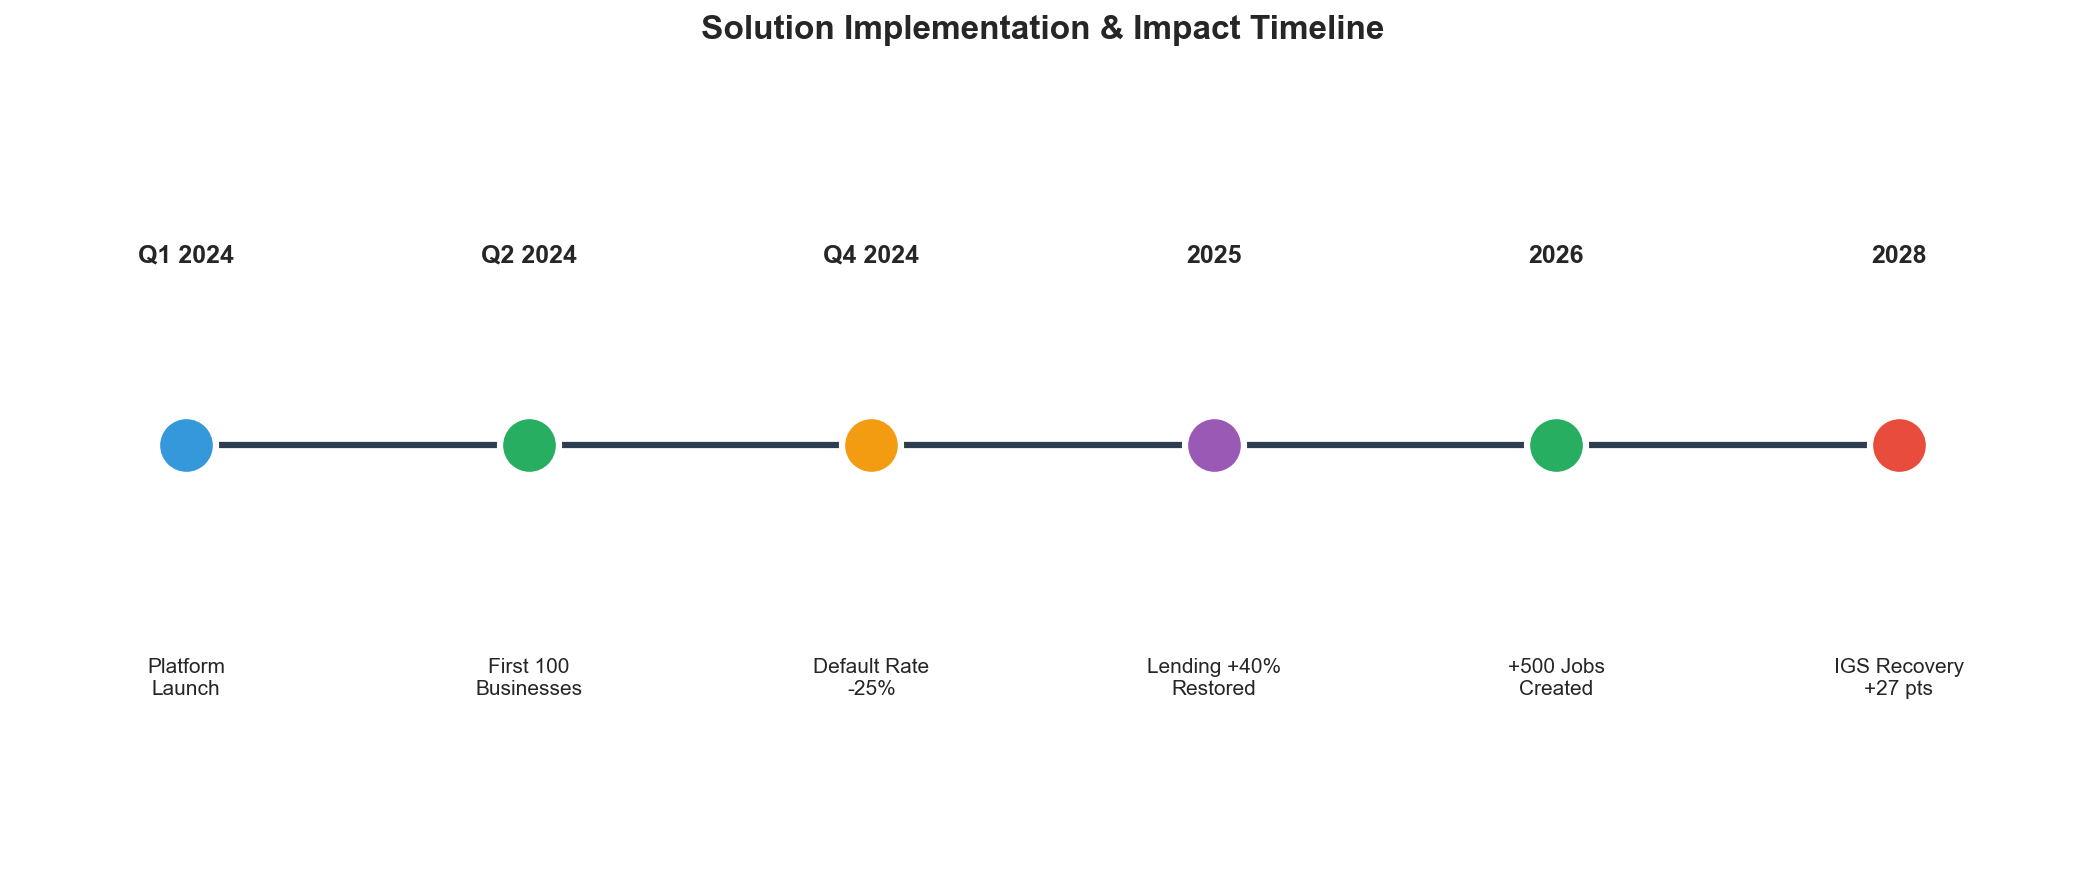

✅ Saved: 09_solution_timeline.png


In [68]:
# 9. Solution Timeline
fig, ax = plt.subplots(figsize=(14, 6))

phases = [
    ('Q1 2024', 'Platform\nLaunch', COLORS['blue']),
    ('Q2 2024', 'First 100\nBusinesses', COLORS['green']),
    ('Q4 2024', 'Default Rate\n-25%', COLORS['orange']),
    ('2025', 'Lending +40%\nRestored', COLORS['purple']),
    ('2026', '+500 Jobs\nCreated', COLORS['green']),
    ('2028', 'IGS Recovery\n+27 pts', COLORS['red']),
]

x_pos = np.arange(len(phases))
for i, (time, label, color) in enumerate(phases):
    ax.scatter(i, 1, s=800, c=color, zorder=5, edgecolors='white', linewidth=3)
    ax.text(i, 1.3, time, ha='center', fontsize=12, fontweight='bold')
    ax.text(i, 0.65, label, ha='center', fontsize=10, va='top')

# Connect with line
ax.plot(x_pos, [1]*len(phases), color=COLORS['dark'], linewidth=3, linestyle='-', zorder=1)

ax.set_xlim(-0.5, len(phases)-0.5)
ax.set_ylim(0.3, 1.6)
ax.axis('off')
ax.set_title('Solution Implementation & Impact Timeline', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "09_solution_timeline.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 09_solution_timeline.png")


## 🔟 Causal Chain Diagram


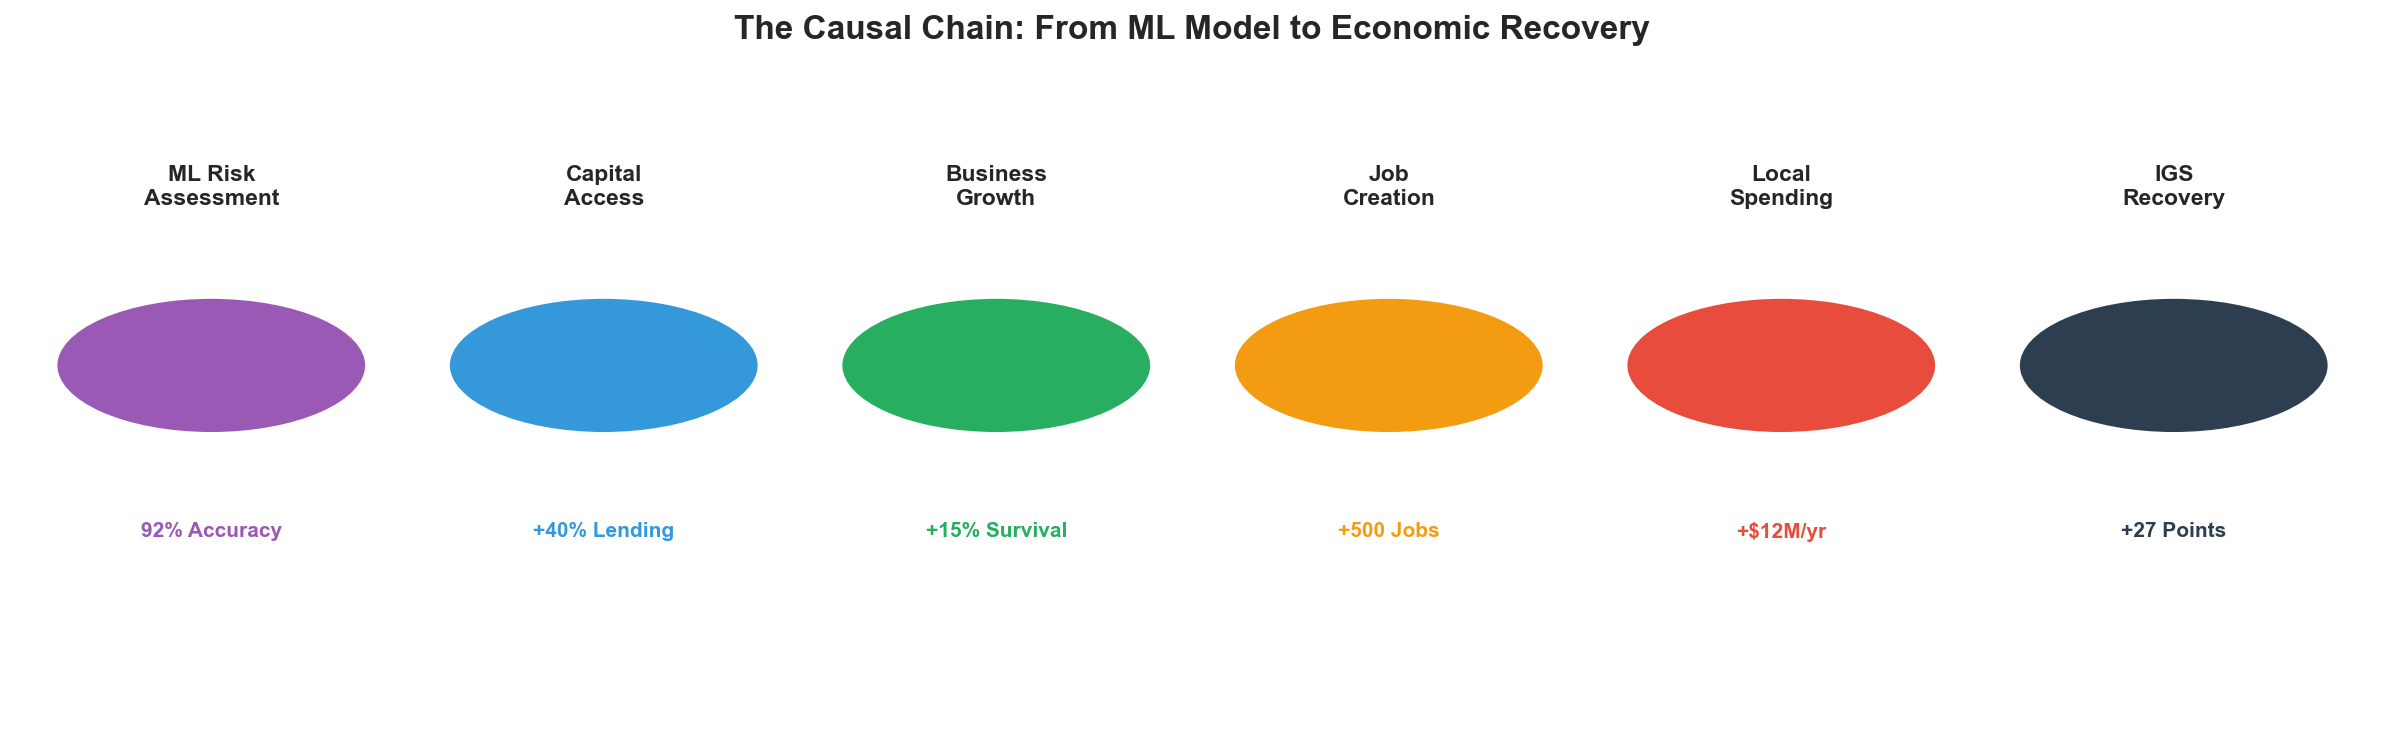

✅ Saved: 10_causal_chain.png


In [69]:
# 10. Causal Chain Diagram
fig, ax = plt.subplots(figsize=(16, 5))
ax.axis('off')

steps = [
    ('ML Risk\nAssessment', COLORS['purple'], '92% Accuracy'),
    ('Capital\nAccess', COLORS['blue'], '+40% Lending'),
    ('Business\nGrowth', COLORS['green'], '+15% Survival'),
    ('Job\nCreation', COLORS['orange'], '+500 Jobs'),
    ('Local\nSpending', COLORS['red'], '+$12M/yr'),
    ('IGS\nRecovery', COLORS['dark'], '+27 Points'),
]

x_positions = np.linspace(0, 1, len(steps))
y = 0.5

for i, (label, color, metric) in enumerate(steps):
    # Circle node
    circle = plt.Circle((x_positions[i], y), 0.08, color=color, ec='white', linewidth=3)
    ax.add_patch(circle)
    
    # Labels
    ax.text(x_positions[i], y + 0.18, label, ha='center', va='bottom', fontsize=11, fontweight='bold')
    ax.text(x_positions[i], y - 0.18, metric, ha='center', va='top', fontsize=10, color=color, fontweight='bold')
    
    # Arrow to next
    if i < len(steps) - 1:
        ax.annotate('', xy=(x_positions[i+1] - 0.1, y), xytext=(x_positions[i] + 0.1, y),
                   arrowprops=dict(arrowstyle='->', color='gray', lw=2))

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0.1, 0.9)
ax.set_title('The Causal Chain: From ML Model to Economic Recovery', fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "10_causal_chain.png", bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Saved: 10_causal_chain.png")


## ✅ Summary - All Saved Visualizations
